<a href="https://colab.research.google.com/github/JuniorHZ19/ArquitecturasCNN/blob/main/CNNSIMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
#CNN SIMPLE:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir un modelo simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.maxpool=nn.MaxPool2d(kernel_size=2)

        self.flatten=nn.Flatten(start_dim=1)

        self.relu=nn.ReLU()

        self.fc1 = nn.Linear(128*5*5, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 10)

        self.dropout=nn.Dropout(0.5)


    def forward(self, x):

        x = self.conv1(x)
        x=self.relu(x)

        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.relu(x)

        x = self.maxpool(x)

        x = self.conv3(x)
        x = self.relu(x)

        x = self.maxpool(x)

        x = self.flatten(x)

        x=self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x=self.dropout(x)
        x = self.relu(x)


        x=self.fc3(x)


        return x

In [1]:
def accurity(predicciones,etiquetas_reales,multiclase=False):

  if(multiclase==False):

    predicciones_clase=predicciones.round()

  else:

    predicciones_clase=torch.argmax(predicciones,dim=1) #toma dim=1 el indice maximo de la fila

  aciertos=(predicciones_clase.squeeze()==etiquetas_reales).sum().item()

  accuraty=aciertos/len(etiquetas_reales)

  return accuraty

In [2]:
def trainModel(model,epochs,dataLoader,dataLoader_test,optimiser,funcion_loss,multiclase=True):

  for epoch in range(epochs):

    epoch_loss=0

    model.train()

    for batch_data,batch_labels in (dataLoader):

       output=model(batch_data)

       loss=funcion_loss(output,batch_labels)

       optimiser.zero_grad()

       loss.backward()

       optimiser.step()

       epoch_loss +=loss.item()

    model.eval()
    accurity_total=0
    with torch.no_grad():

      for batch_data,batch_labels in (dataLoader_test):

        output=model(batch_data)

        accurity_total+=accurity(output,batch_labels,multiclase)


    accurity_promedio=accurity_total/len(dataLoader_test) # se calcula un accirty total de todos los batchs y se divide entre el total de batches para tener un promedio

    epoch_loss/=len(dataLoader)

    print(f"Época {epoch+1}, Pérdida : {epoch_loss:.4f} , Accurity:{accurity_promedio:.4f}")


  return model,optimiser



100%|██████████| 170M/170M [00:18<00:00, 9.22MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


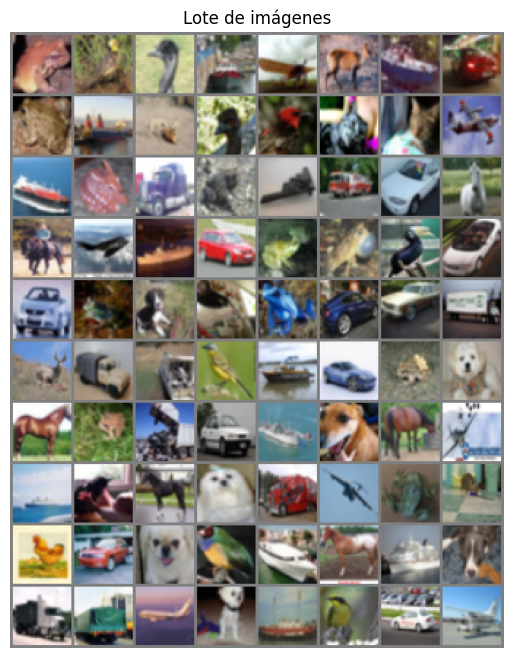

In [8]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Transformaciones básicas para las imágenes
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir las imágenes a tensores
    transforms.Resize((40,40)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizar a [-1, 1]
])

# Cargar el dataset CIFAR-10
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=80, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=80, shuffle=False, num_workers=2)


data_lote,labels_lote=next(iter(train_loader))

grid = make_grid(data_lote, nrow=8, padding=2)

# Convertir la cuadrícula a formato visualizable
grid_np = grid.permute(1, 2, 0).numpy()
grid_np = (grid_np * 0.5) + 0.5  # Desnormalizar si las imágenes están normalizadas

# Mostrar la cuadrícula
plt.figure(figsize=(20, 8))
plt.imshow(grid_np)
plt.axis('off')
plt.title('Lote de imágenes')
plt.show()

In [28]:
# Inicializar modelo, pérdida y optimizador
modelo = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelo.parameters(), lr=0.001, betas=(0.9,0.999))
epochs=5

modelo_entrenado,optimisador_entrenado=trainModel(modelo,epochs,train_loader,test_loader,optimizer,criterion)

Época 1, Pérdida : 1.6488 , Accurity:0.5168
Época 2, Pérdida : 1.2436 , Accurity:0.5908
Época 3, Pérdida : 1.0476 , Accurity:0.6765
Época 4, Pérdida : 0.8971 , Accurity:0.7076
Época 5, Pérdida : 0.7939 , Accurity:0.7264


Es un : bird
con probaildad : tensor([0.4139])


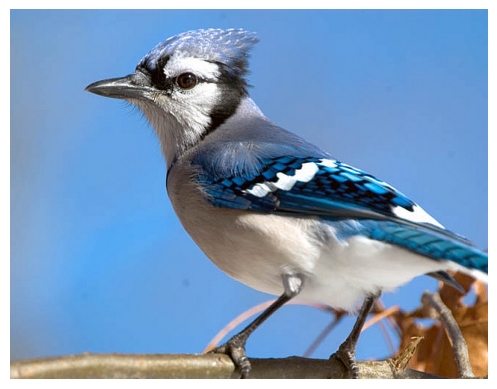

In [96]:
#Usar modelo:

from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
file_path = "/content/ave.jpeg" # @param {type:"string"}

img = Image.open(file_path)

# Transformaciones básicas para las imágenes
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir las imágenes a tensores
    transforms.Resize((40,40)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizar a [-1, 1]
])

tensor_img=transform(img)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

modelo_entrenado.eval()
with torch.no_grad():
 output=modelo_entrenado(tensor_img.unsqueeze(0))
 probabilities = F.softmax(output, dim=1)

max_value, max_index = torch.max(probabilities, dim=1)


print('Es un :',classes[max_index])
print('con probaildad :',max_value)

plt.imshow(img)
plt.axis('off')  # Opcional: Desactiva los ejes para solo mostrar la imagen
plt.show()


In [ ]:
#Guardar modelo y optimzador:

torch.save({
    'model_state_dict': modelo.state_dict(),  # Guardar solo los pesos del modelo
    'optimizer_state_dict': optimizer.state_dict()  # Guardar el estado del optimizador
}, 'checkpoint.pth')





In [35]:
#Cargar Modelo Entrenado

modelo_entrenado = SimpleCNN()  # Asegúrate de definir la clase antes
optimizer_entrenado = torch.optim.Adam(modelo_entrenado.parameters(), lr=0.001)  # Define el optimizador

# Cargar el checkpoint
checkpoint = torch.load('checkpoint.pth')

# Restaurar el estado del modelo y el optimizador
modelo_entrenado.load_state_dict(checkpoint['model_state_dict'])
optimizer_entrenado.load_state_dict(checkpoint['optimizer_state_dict'])

# Si estás en modo de predicción, coloca el modelo en modo evaluación
modelo_entrenado.eval()



<ipython-input-35-5239a212ea2e>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoint.pth')


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
  (fc1): Linear(in_features=3200, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

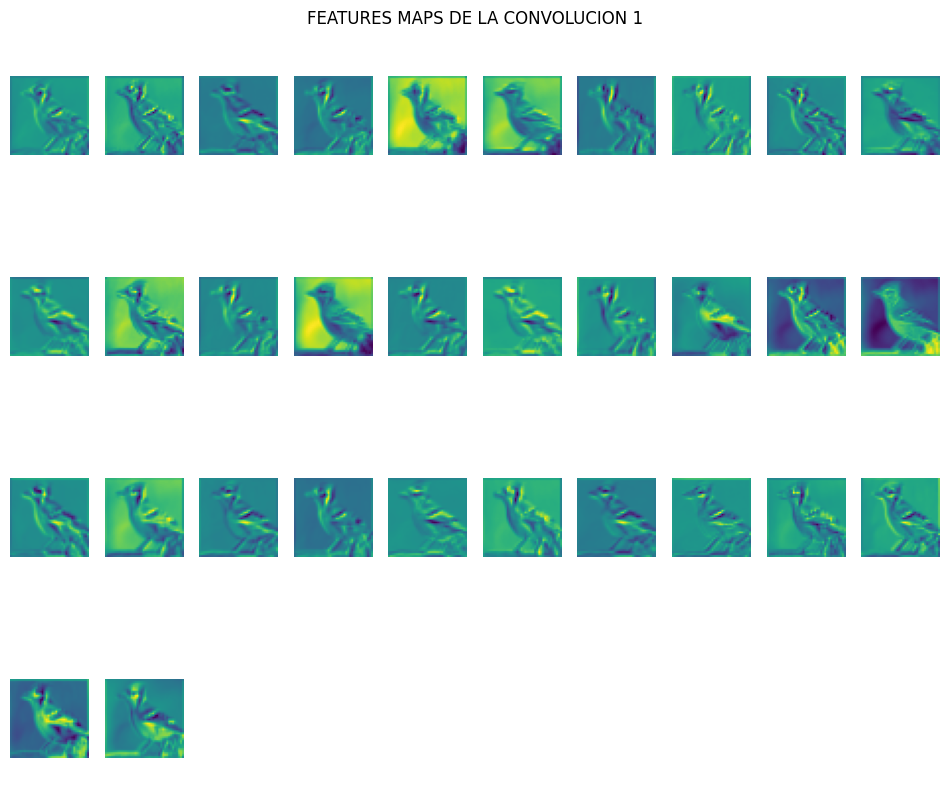

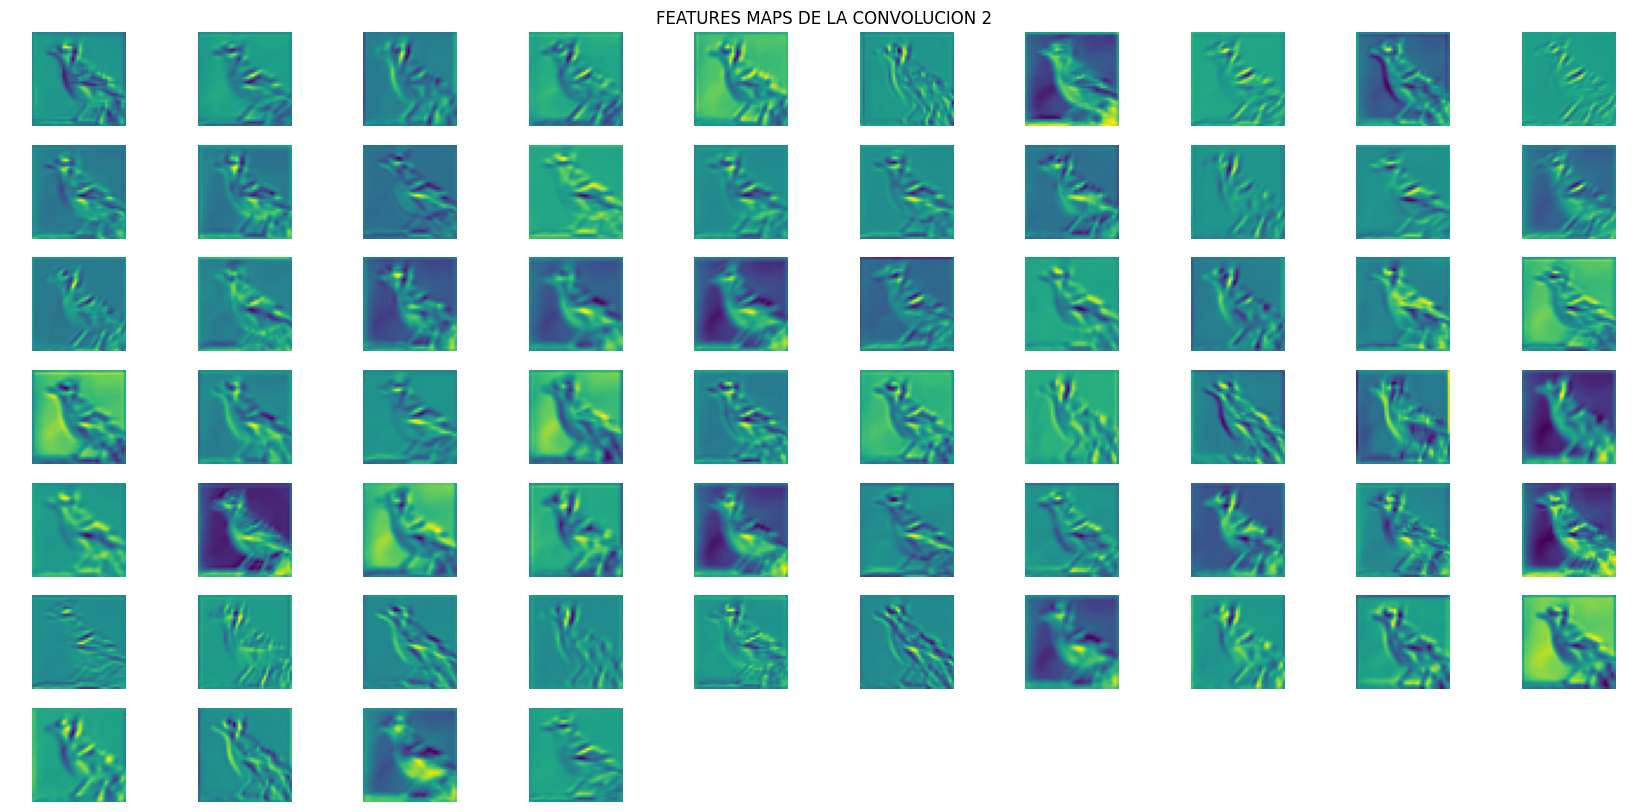

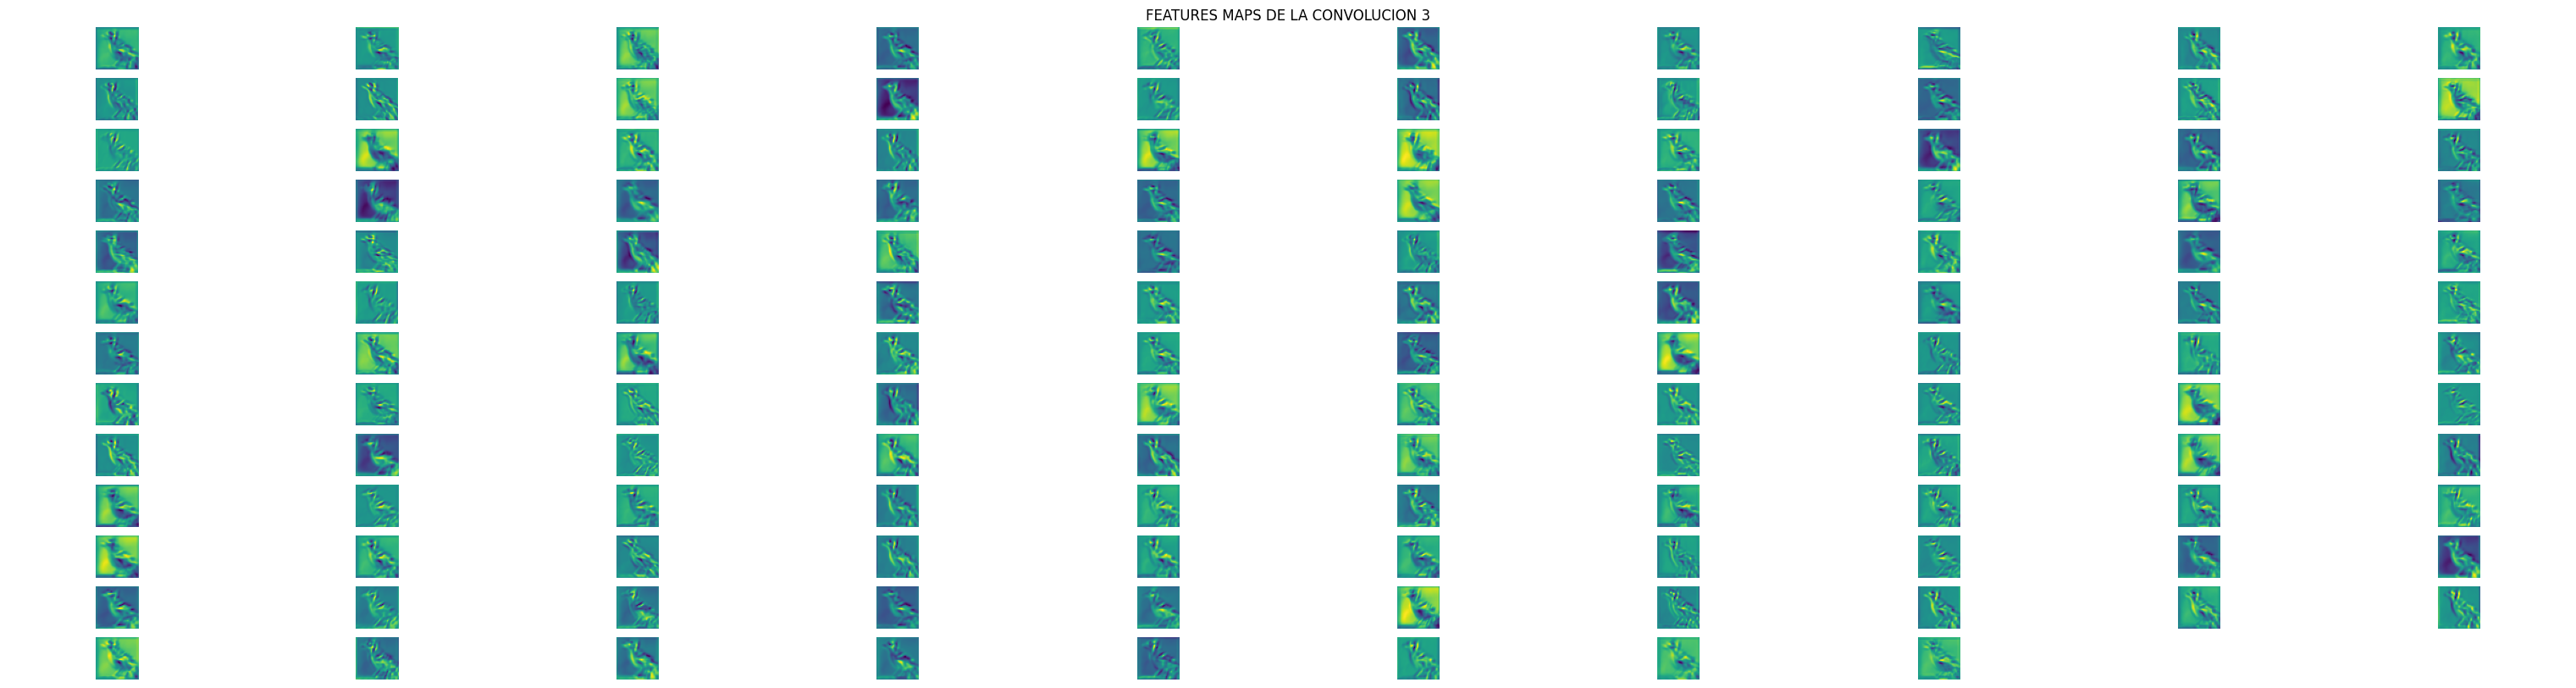

In [116]:
#Visualizar features del modelo:

import math
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
file_path = "/content/ave.jpeg" # @param {type:"string"}

img = Image.open(file_path)

# Transformaciones básicas para las imágenes
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir las imágenes a tensores
    transforms.Resize((40,40)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalizar a [-1, 1]
])

tensor_img=transform(img)
layers=list(modelo_entrenado.children())
conv_layers = [layer for layer in layers if isinstance(layer, nn.Conv2d)]
output=None

for i_layer,conv_layer in enumerate(conv_layers):
  if(output==None):
   output=conv_layer(tensor_img)
  else:
   output=conv_layer(output)
  ncols = 10
  nrows = math.ceil(len(output) / ncols)
  plt.figure(figsize=(nrows*3, ncols*1))
  plt.title(f'FEATURES MAPS DE LA CONVOLUCION {i_layer+1}')
  plt.axis('off')
  for i,f in enumerate(output):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(f.detach().cpu().numpy())
    plt.axis('off')

plt.show()
plt.close()





In [ ]:
#Reentrenar(antes debeos cargar el modelo como optizmiador y cargar datastets y dataloader):

epochs=10
criterion = nn.CrossEntropyLoss()

modelo_entrenado,optimisador_entrenado=trainModel(modelo_entrenado,epochs,train_loader,test_loader,optimizer_entrenado,criterion)